# Module 2 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
***Results: There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values.***

In [2]:
pokedex = pd.read_csv(fp)
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


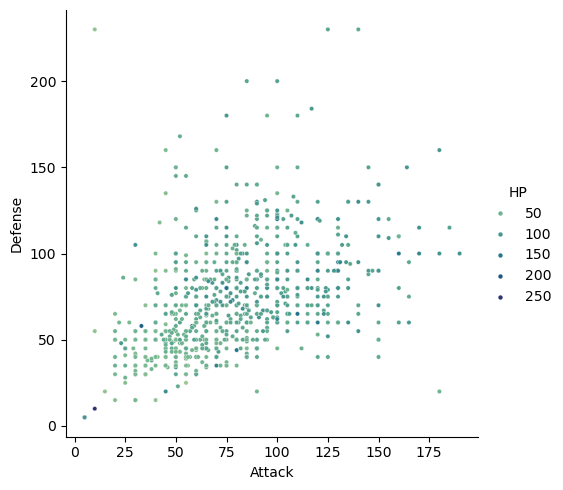

In [3]:
# Your code here . . .
sns.relplot(data=pokedex, x="Attack", y="Defense", s=10, hue='HP', palette='crest')

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

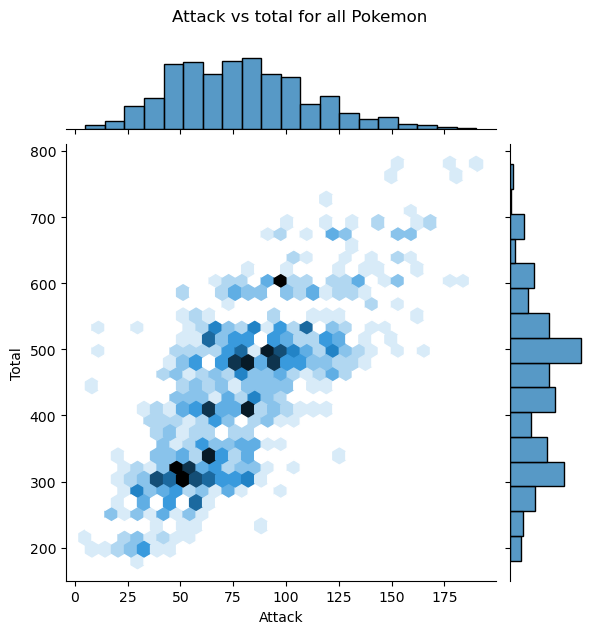

In [7]:
# Your code here . . .
g = sns.jointplot(
    data=pokedex,
    x = "Attack",
    y = "Total",
    kind = "hex",
    gridsize = 30 #how many hexes wide and high
)
g.fig.suptitle("Attack vs total for all Pokemon", y = 1.05);

***From the plot, I observed a positive correlation between Attack and Total. This means pokemon with higher attack damage will have higher overall damage. The additonal hexplots indicates the density of datapoints that fall under each total and attack values. Esch plot can be used to determine roughly how many pokemon get do certain attack damage and total damage.***

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

In [97]:
unique_types = pokedex['Type 1'].unique()
# print(unique_types)
unique2_types = pokedex['Type 2'].unique()
# print(unique2_types)

type_count = {type: ((pokedex['Type 1'] == type)).sum() for type in unique_types}
type2_count = {type: (pokedex['Type 2'] == type).sum() for type in unique2_types}
print(type_count)
print(type2_count)


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
{'Grass': 70, 'Fire': 52, 'Water': 112, 'Bug': 69, 'Normal': 98, 'Poison': 28, 'Electric': 44, 'Ground': 32, 'Fairy': 17, 'Fighting': 27, 'Psychic': 57, 'Rock': 44, 'Ghost': 32, 'Ice': 24, 'Dragon': 32, 'Dark': 31, 'Steel': 27, 'Flying': 4}
{'Poison': 34, nan: 0, 'Flying': 97, 'Dragon': 18, 'Ground': 35, 'Fairy': 23, 'Grass': 25, 'Fighting': 26, 'Psychic': 33, 'Steel': 22, 'Ice': 14, 'Rock': 14, 'Dark': 20, 'Water': 14, 'Electric': 6, 'Fire': 12, 'Ghost': 14, 'Bug': 3, 'Normal': 4}


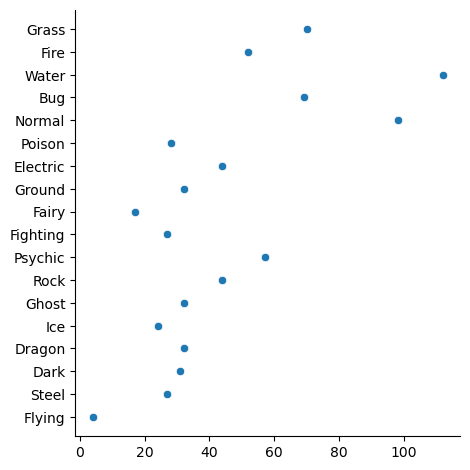

In [99]:
sns.relplot(
    x=list(type_count.values()),
    y=list(type_count.keys()),kind="scatter")

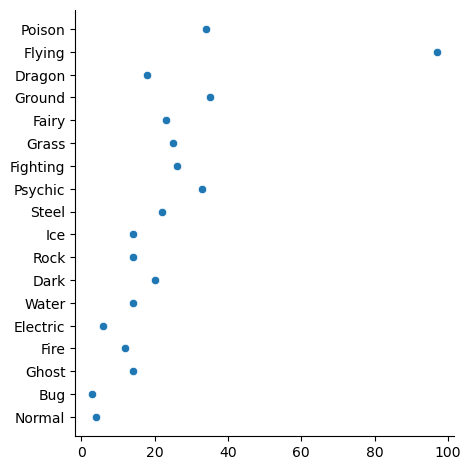

In [101]:
sns.relplot(
    x=list(type2_count.values()),
    y=list(type2_count.keys()),kind="scatter")

***Based on these simple scatter plots, I can tell that the most common Type 1 category amongst the pokemon is Water and the least common is Flying. The most common amongst Type 2 was Flying. ***